<a href="https://colab.research.google.com/github/moch1996/MachineLearningProj/blob/master/assignment_05_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Supervised classification - improving capacity learning
<hr>

## 0. Import library
<hr>
Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


## 1. Load and plot the dataset (dataset-noise-02.txt)
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$.

The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.

You may use matplotlib function `scatter(x,y)`.

In [2]:
#Import data with numpy
data = np.genfromtxt('dataset-b.txt', delimiter= ',')
data[0,0] = 8.171466764496124746e-01
data[:2]

array([[ 0.81714668, -0.06387847,  0.        ],
       [ 1.42722373,  0.10704005,  0.        ]])

Number of the data = 1000
Shape of the data = (1000, 3)
Data type of the data = float64


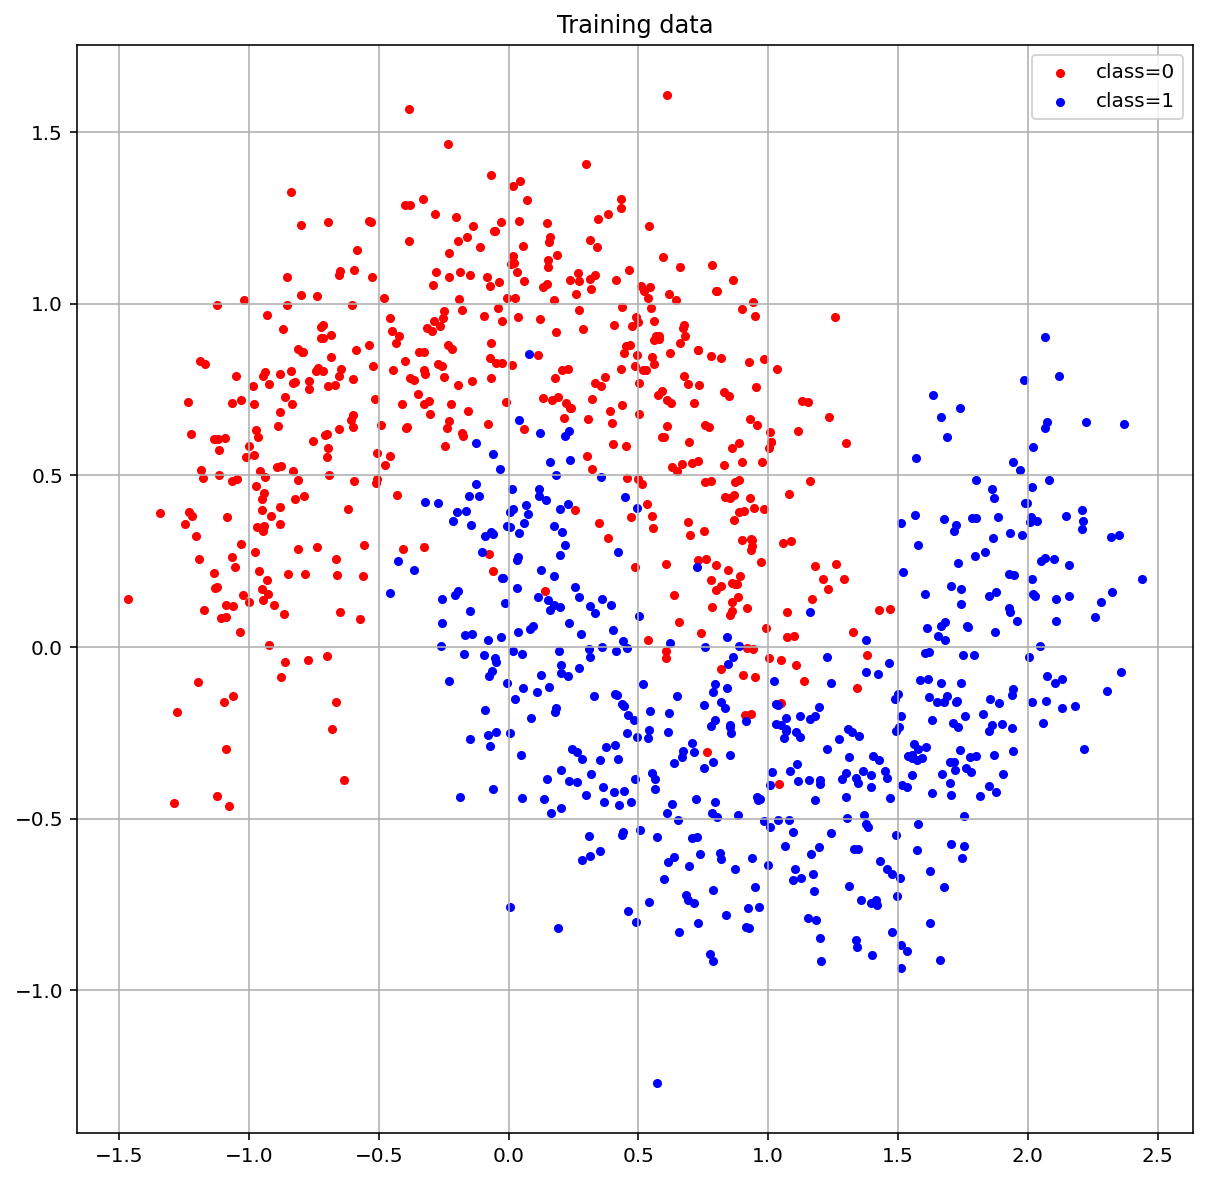

In [3]:
# number of training data
n = data.shape[0] 
print('Number of the data = {}'.format(n))
print('Shape of the data = {}'.format(data.shape))
print('Data type of the data = {}'.format(data.dtype))

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label

#idx_class0 =   # index of class0
#idx_class1 =   # index of class1

plt.figure(1,figsize=(10,10))
plt.scatter(x1[idx==0] ,x2[idx==0] , s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx==1] ,x2[idx==1] , s=50, c='b', marker='.', label='class=1')
plt.grid(True)
plt.title('Training data')
plt.legend(loc = 'upper right')
plt.show()

## 2. Define a logistic regression loss function and its gradient
<hr>

In [4]:
def sigmoid(z):
    sigmoid_f = 1/(1+np.exp(-z))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(np.dot(X,w))
    return p


# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = (-np.dot(y.T,np.log(y_pred))-np.dot((1-y).T,np.log(1-y_pred))) / n
    return loss


# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = (2 * np.dot(X.T,y_pred-y)) / n
    return grad


# gradient descent function definition
def grad_desc(X, y , w_init, tau, iteration):

    n = len(y)
    loss_history = np.zeros(iteration)
    coef_history = np.zeros((iteration,10))
    w = w_init # initialization

    for i in range(iteration): # loop over the iterations
        y_pred =  f_pred(X,w)
        grad_f =  grad_loss(y_pred,y,X) # gradient of the loss  
        w = w - tau*grad_f # update rule of gradient descent  
        loss_history[i] = loss_logreg(y_pred,y) # save the current loss value
        coef_history[i,:] = w.T 
        
    return w, loss_history, coef_history

## 3. define a prediction function and run a gradient descent algorithm
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

The prediction function can be defined in terms of the following feature functions $f_i$ as follows:

$$
X = 
\left[ 
\begin{array}{cccccc}
f_0(x_1) & f_1(x_1) & f_2(x_1) & f_3(x_1) & f_4(x_1) & f_5(x_1) & f_6(x_1) & f_7(x_1) & f_8(x_1) & f_9(x_1) \\
f_0(x_2) & f_1(x_2) & f_2(x_2) & f_3(x_2) & f_4(x_2) & f_5(x_2) & f_6(x_2) & f_7(x_2) & f_8(x_2) & f_9(x_2) \\
\vdots\\
f_0(x_n) & f_1(x_n) & f_2(x_n) & f_3(x_n) & f_4(x_n) & f_5(x_n) & f_6(x_n) & f_7(x_n) & f_8(x_n) & f_9(x_n) \\
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2 \\ 
w_3 \\ 
w_4 \\ 
w_5 \\
w_6 \\ 
w_7 \\ 
w_8 \\ 
w_9
\end{array} 
\right]
\quad
$$

where $x_i = (x_i(1), x_i(2))$ and you can define a feature function $f_i$ as you want.

You can use at most 10 feature functions $f_i$, $i = 0, 1, 2, \cdots, 9$ in such a way that the classification accuracy is maximized. You are allowed to use less than 10 feature functions.

Implement the logistic regression function with gradient descent using a vectorization scheme.

In [5]:
# construct the data matrix X, and label vector y

X = np.ones([n,10])
X[:,1] = x1
X[:,2] = x2
X[:,3] = x1**2
X[:,4] = x2**2
X[:,5] = (x1*x2)**2
X[:,6] = (x1**2)*x2
X[:,7] = x1*(x2**2)
X[:,8] = x1**3
X[:,9] = x2**3 
n = data.shape[0]
y = data[:,2][:,None] # label

In [ ]:
1e-3

0.001

In [6]:
# run gradient descent algorithm
start = time.time()
w_init = np.zeros(10)[:,None]
tau = 1e-2; iteration = 79000
w, loss_history, coef_history = grad_desc(X, y , w_init, tau, iteration)

print('TIME=',time.time()-start)
print(loss_history[-1])
print(coef_history[-1].reshape(10,1))

TIME= 13.927934885025024
0.12031396706228485
[[ 3.54865346]
 [-1.38316244]
 [-5.130948  ]
 [-9.38912159]
 [-0.5870824 ]
 [ 2.17534322]
 [-1.75634276]
 [ 2.24424074]
 [ 6.52200482]
 [-2.89266683]]


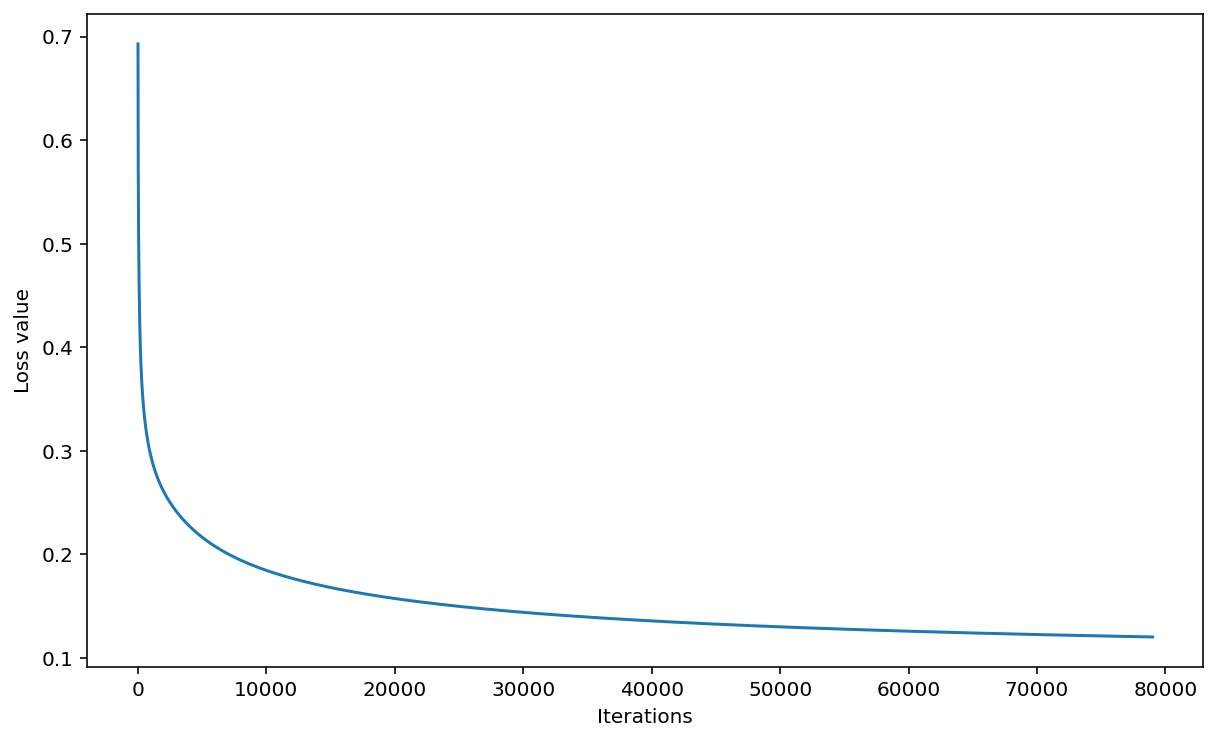

In [7]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

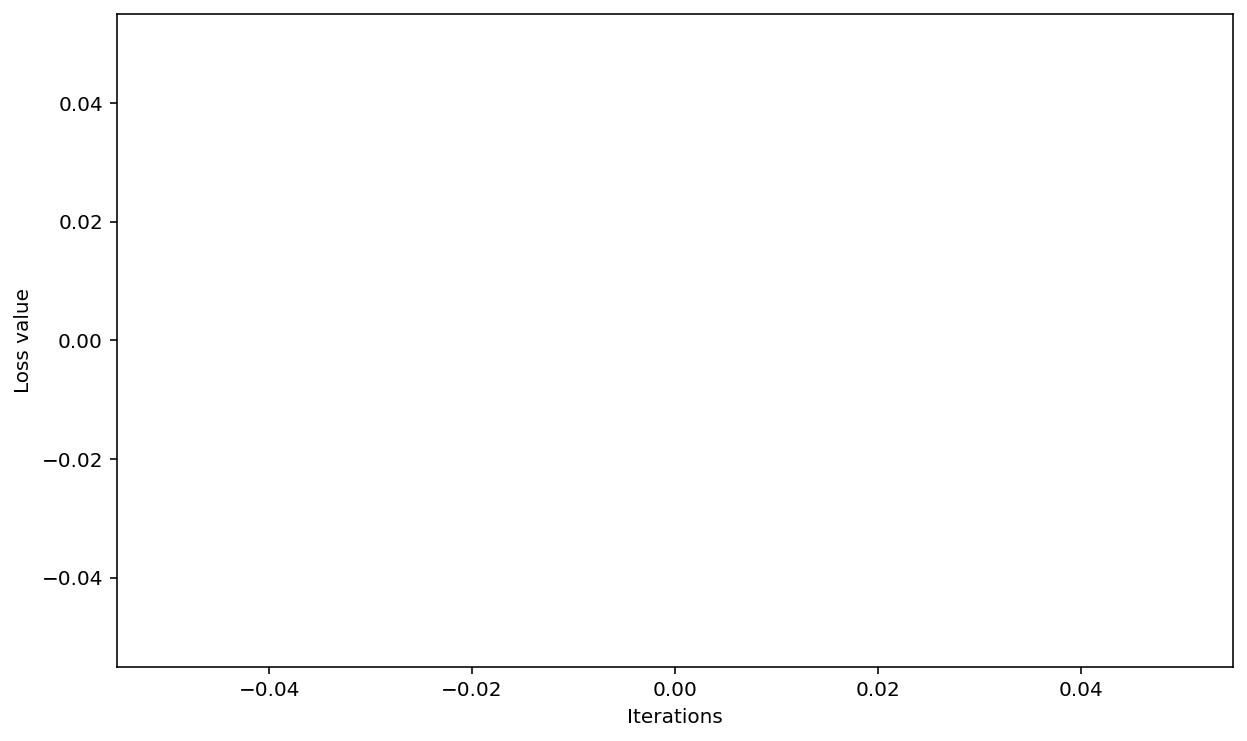

In [8]:
# plot
plt.figure(4, figsize=(10,6))
plt.plot( )
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 4. Plot the decisoin boundary
<hr>

In [9]:
# compute values p(x) for multiple data points x
x1_min, x1_max = x1.min(), x1.max()    # min and max of grade 1
x2_min, x2_max = x2.min(), x2.max()    # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max), np.linspace(x2_min,x2_max))               # create meshgrid
X2 = np.ones((xx1.shape[0],xx2.shape[0],10))
X2[:,:,1] = xx1
X2[:,:,2] = xx2
X2[:,:,3] = xx1**2
X2[:,:,4] = xx2**2
X2[:,:,5] = xx1*xx2
X2[:,:,6] = (xx1**2)*xx2
X2[:,:,7] = xx1*(xx2**2)
X2[:,:,8] = xx1**3
X2[:,:,9] = xx2**3

w2 = coef_history[-1][:,None]
w2.shape

(10, 1)

In [10]:
p = f_pred(X2,w2)
p = p.reshape(xx1.shape )

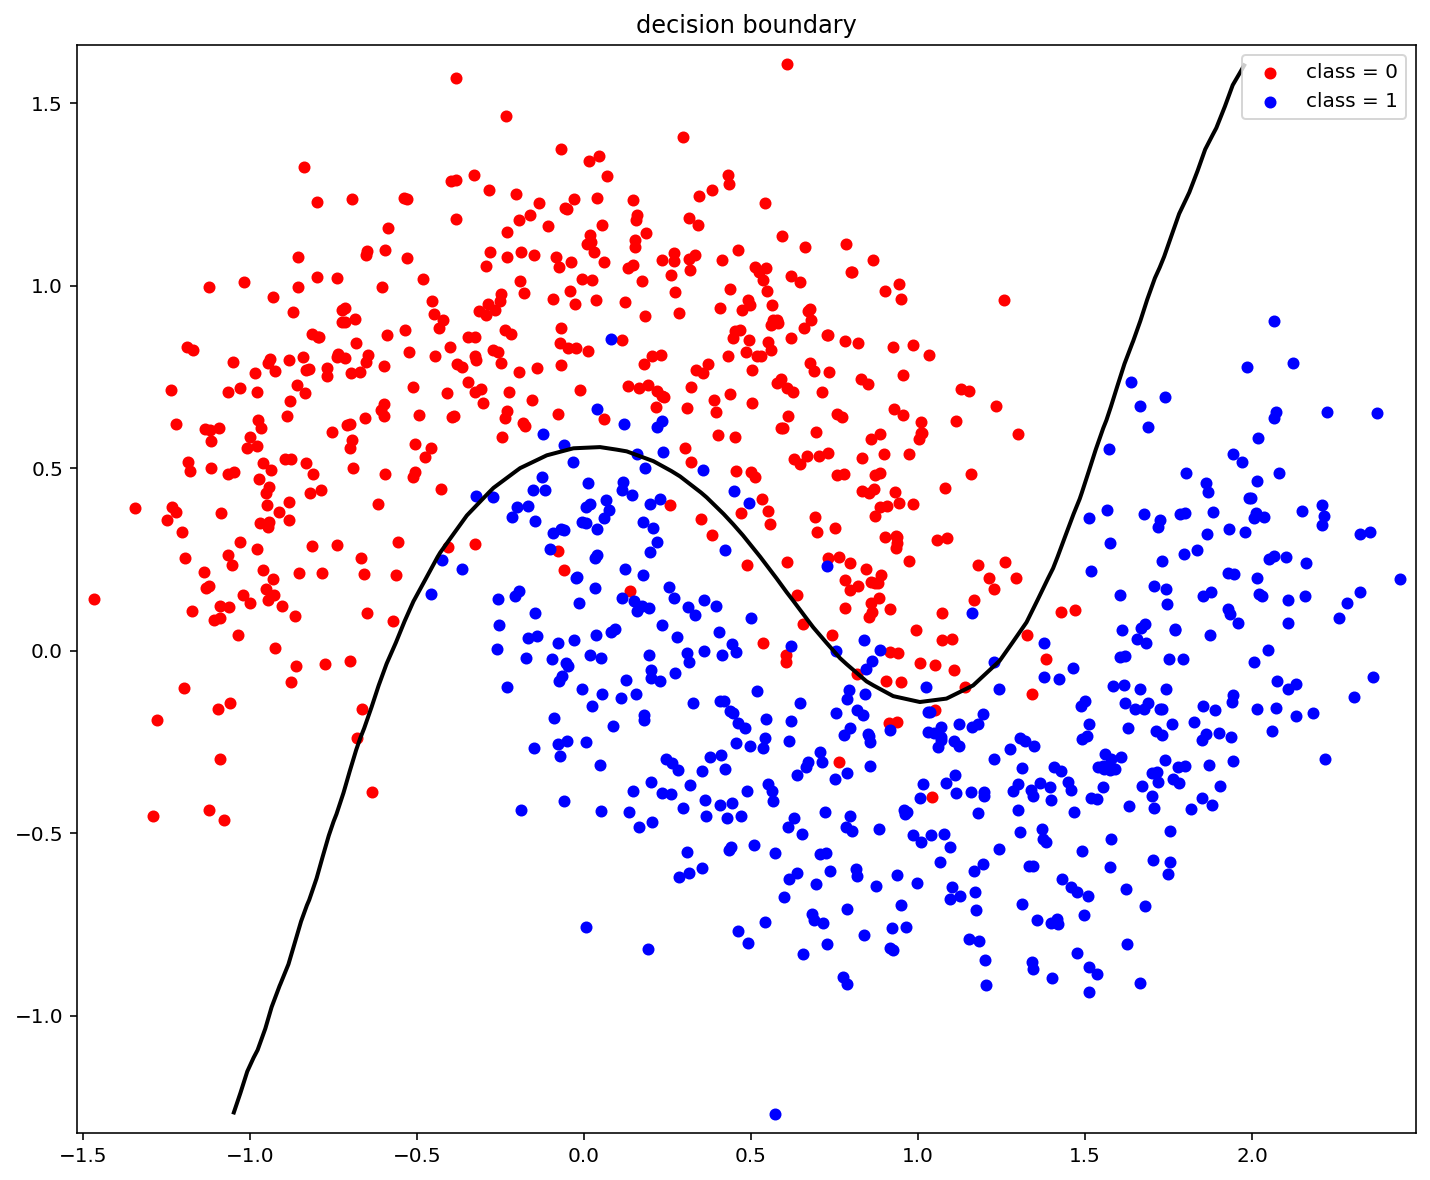

In [11]:
# plot
plt.figure(4,figsize=(12,10))

#ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
#cbar = plt.colorbar(ax)
#cbar.update_ticks()

plt.scatter(x1[idx==0],x2[idx==0], s=25, c='r', label ='class = 0')
plt.scatter(x1[idx==1],x2[idx==1], c='blue', s=25, label = 'class = 1')
plt.contour(xx1,xx2, p,levels=[0.5], linewidths=2, colors='k') 
plt.legend(loc='best')
plt.xlim([x1_min-0.05,x1_max+0.05])
plt.ylim([x2_min-0.05,x2_max+0.05])
plt.title('decision boundary')
plt.show()

In [12]:
# plot
plt.figure(4,figsize=(12,10))

#ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
#cbar = plt.colorbar(ax)
#cbar.update_ticks()

plt.scatter(, s=50, c='r', marker='.', label='Class0') 
plt.scatter(, s=50, c='b', marker='.', label='Class1')
plt.contour(, linewidths=2, colors='k') 
plt.legend()
plt.title(' ')
plt.show()

SyntaxError: ignored

## 5. Plot the probability map
<hr>

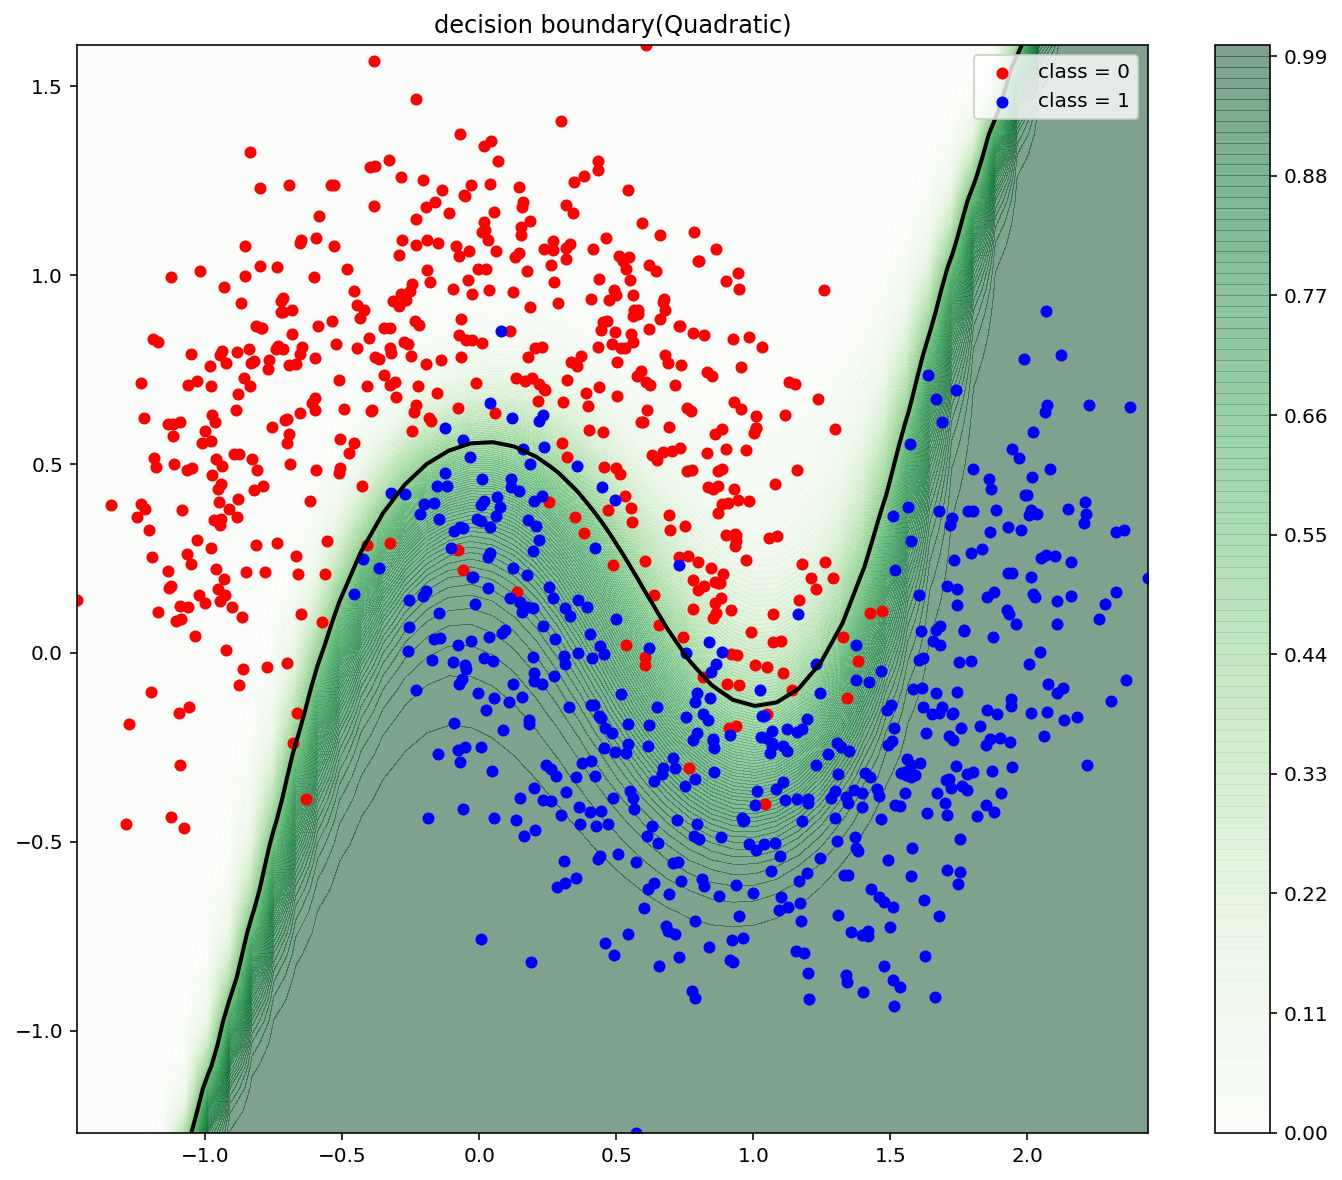

In [13]:
# compute values p(x) for multiple data points x
plt.figure(4,figsize=(12,10))

ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='Greens', alpha=0.5)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter(x1[idx==0],x2[idx==0], s=25, c='r', label ='class = 0')
plt.scatter(x1[idx==1],x2[idx==1], c='blue', s=25, label = 'class = 1')
plt.contour(xx1,xx2, p,levels=[0.5], linewidths=2, colors='k') 
plt.legend(loc='best')
plt.title('decision boundary(Quadratic)')
plt.show()

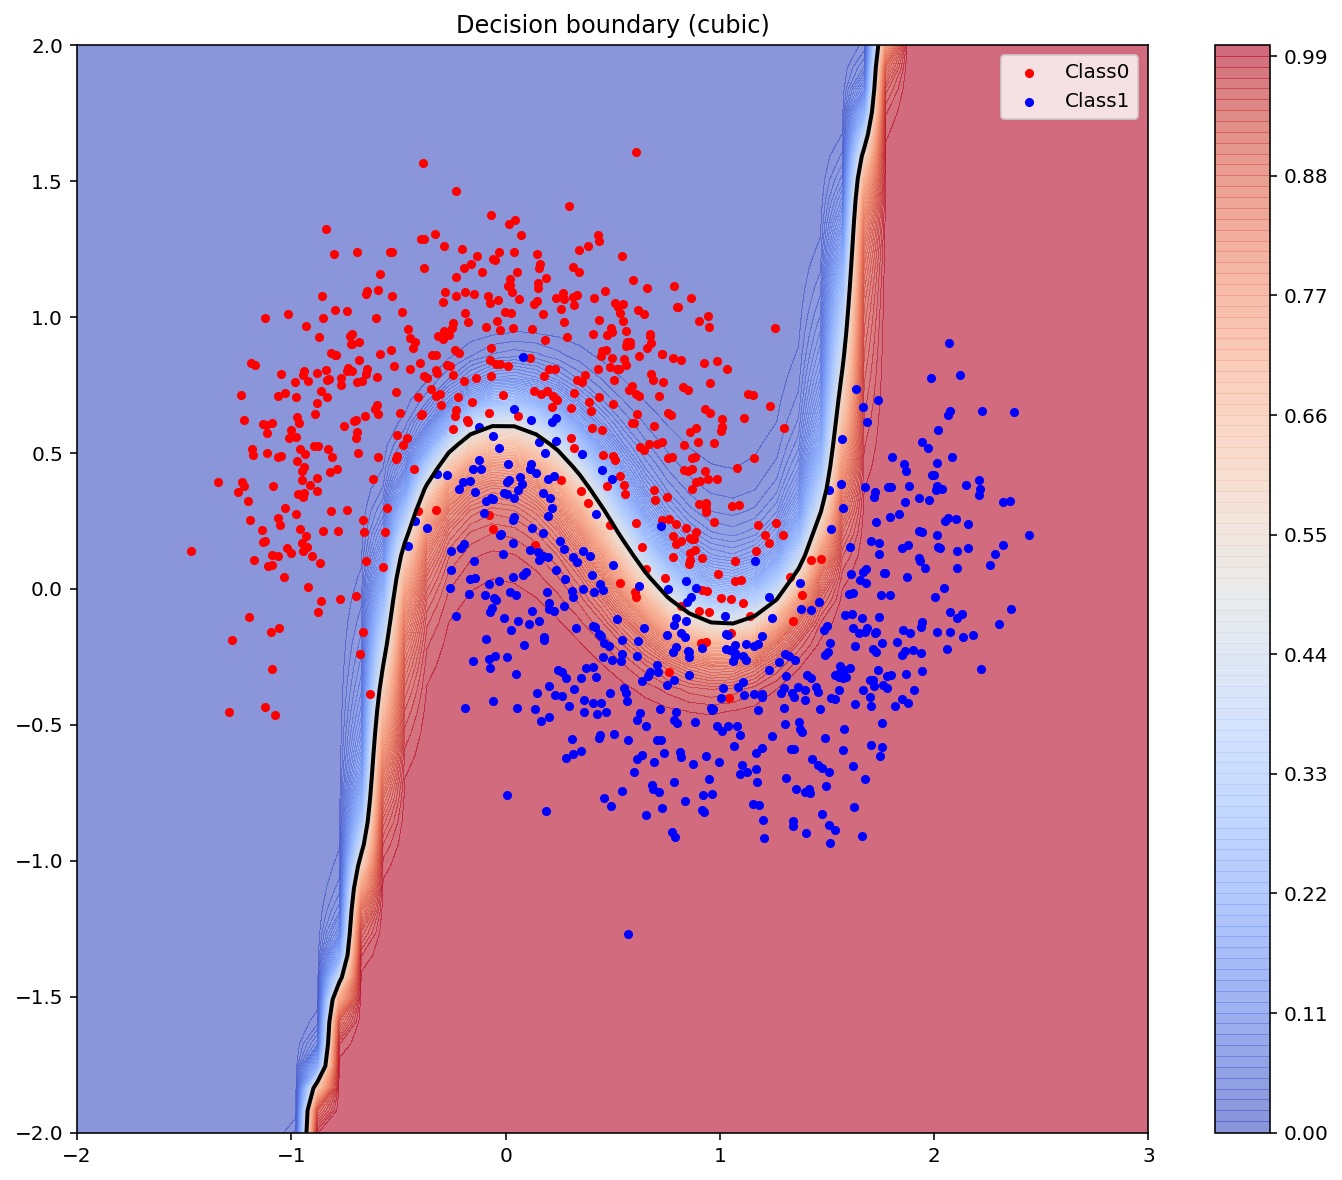

In [ ]:
# compute values p(x) for multiple data points x
x1_min, x1_max =  # min and max of grade 1
x2_min, x2_max =  # min and max of grade 2
xx1, xx2 =  # create meshgrid

X2 = 
p = f_pred( )
p = p.reshape( )

# plot
plt.figure(4,figsize=(12,10))

ax = plt.contourf( )
cbar = plt.colorbar( )
cbar.update_ticks()

plt.scatter( , s=50, c='r', marker='.', label='Class0') 
plt.scatter( , s=50, c='b', marker='.', label='Class1')
plt.contour( ) 
plt.legend()
plt.title('')
plt.show()

## 6. Compute the classification accuracy
<hr>

### The accuracy is computed by:

$$
\textrm{accuracy} = \frac{\textrm{number of correctly classified data}}{\textrm{total number of data}}
$$

In [ ]:
# compute the accuracy of the classifier
n = data.shape[0]

# plot
x1 =   # feature 1
x2 =   # feature 2
idx_class0 =   # index of class0
idx_class1 =   # index of class1

X2 = 
p = f_pred( )

idx_class1_pred = ( )

#print(idx_class1_label)
#print(idx_class1_pred)

idx_wrong = ( )

#print(np.sum(idx_wrong))
print('total number of correctly classified data = ', ( ))
print('accuracy(%) = ',  )

total number of data = 1000
total number of correctly classified data =  960
accuracy(%) =  96.0


## Output using the dataset (dataset-noise-02.txt)
<hr>

## 1. Visualize the data [1pt]
<ht>

Number of the data = 1000
Shape of the data = (1000, 3)
Data type of the data = float64


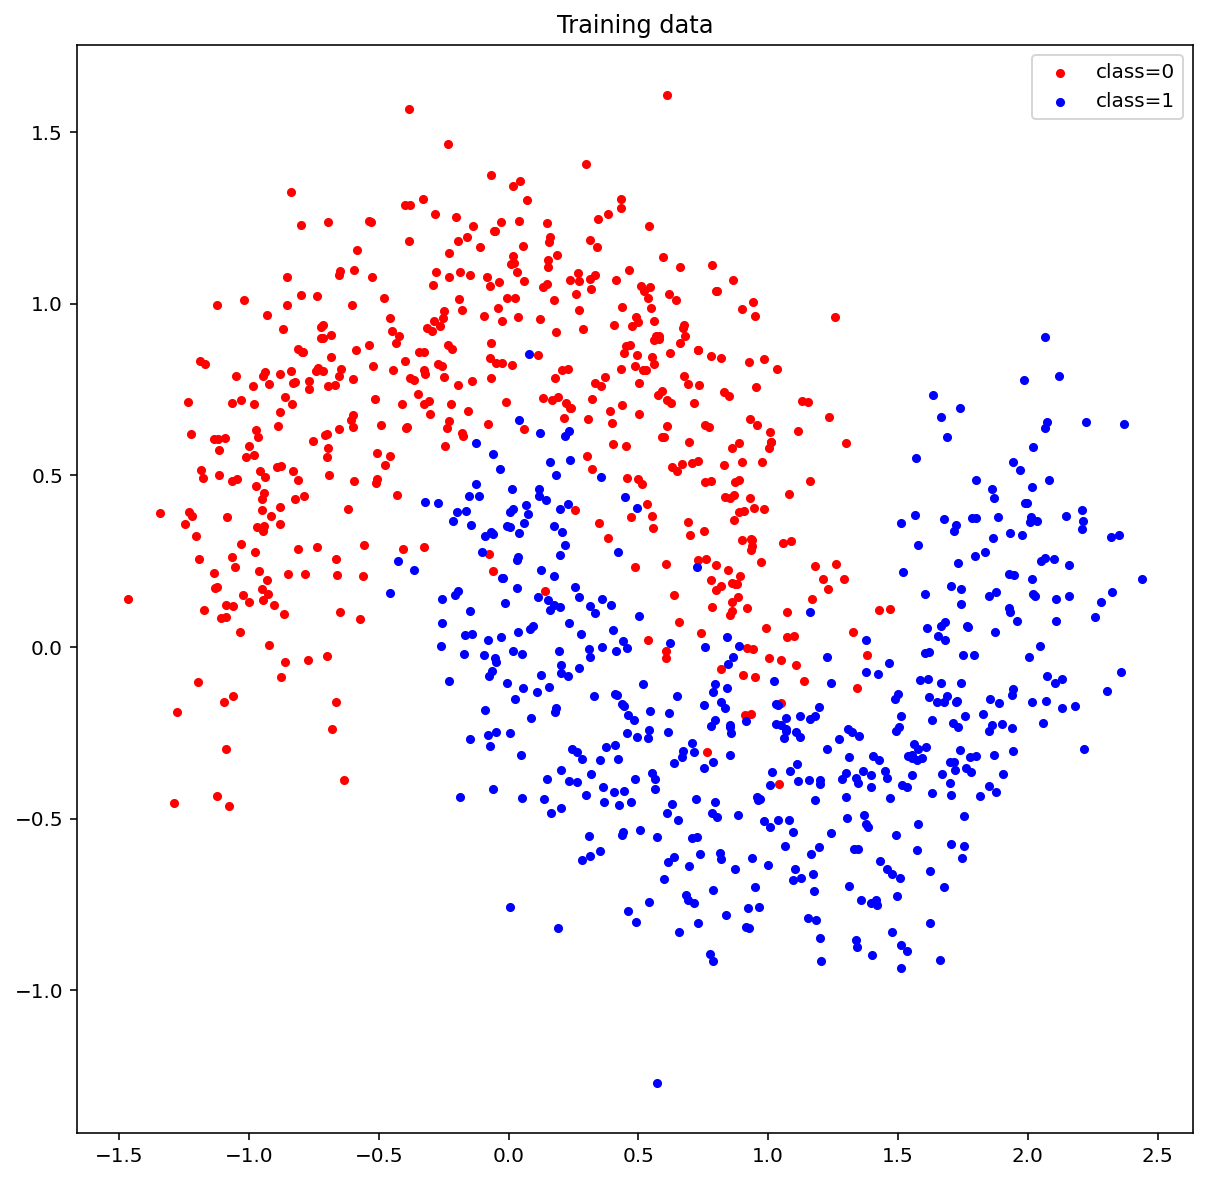

In [14]:
# number of training data
n = data.shape[0] 
print('Number of the data = {}'.format(n))
print('Shape of the data = {}'.format(data.shape))
print('Data type of the data = {}'.format(data.dtype))

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label

plt.figure(1,figsize=(10,10))
plt.scatter(x1[idx==0] ,x2[idx==0] , s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx==1] ,x2[idx==1] , s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend(loc = 'upper right')
plt.show()

## 2. Plot the loss curve obtained by the gradient descent until the convergence [2pt]
<hr>

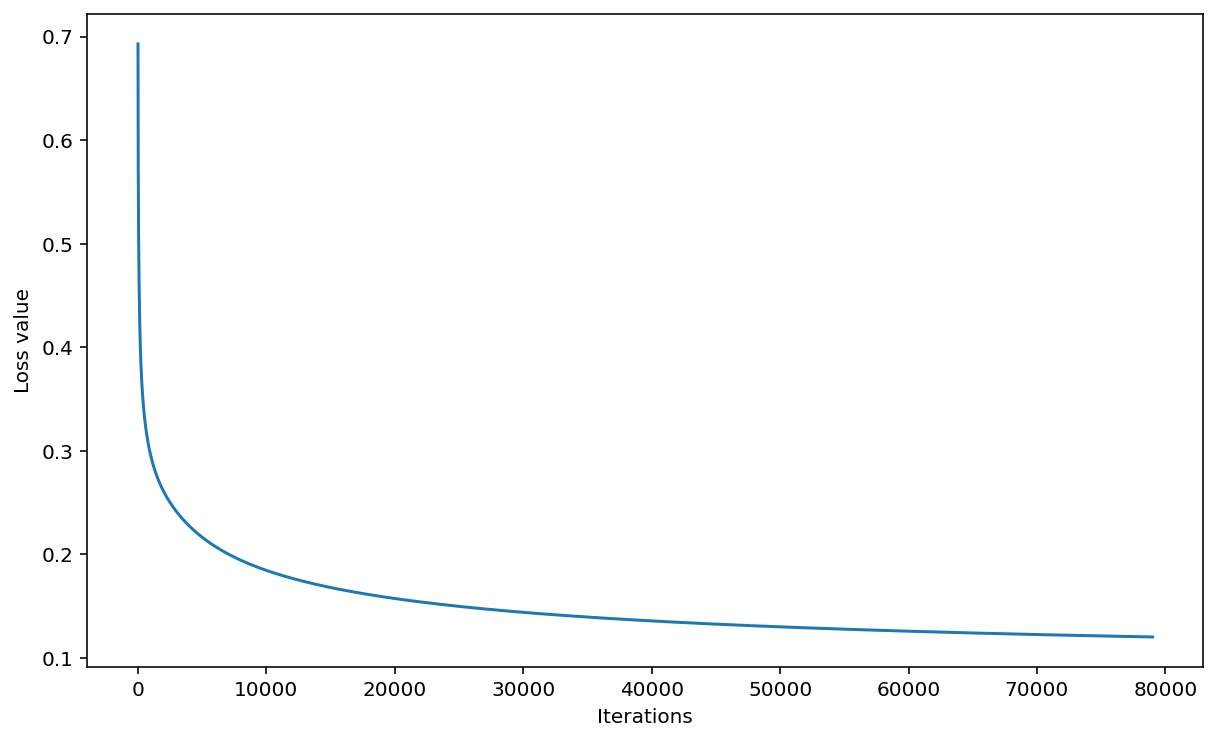

In [15]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 3. Plot the decisoin boundary of the obtained classifier [2pt]
<hr>

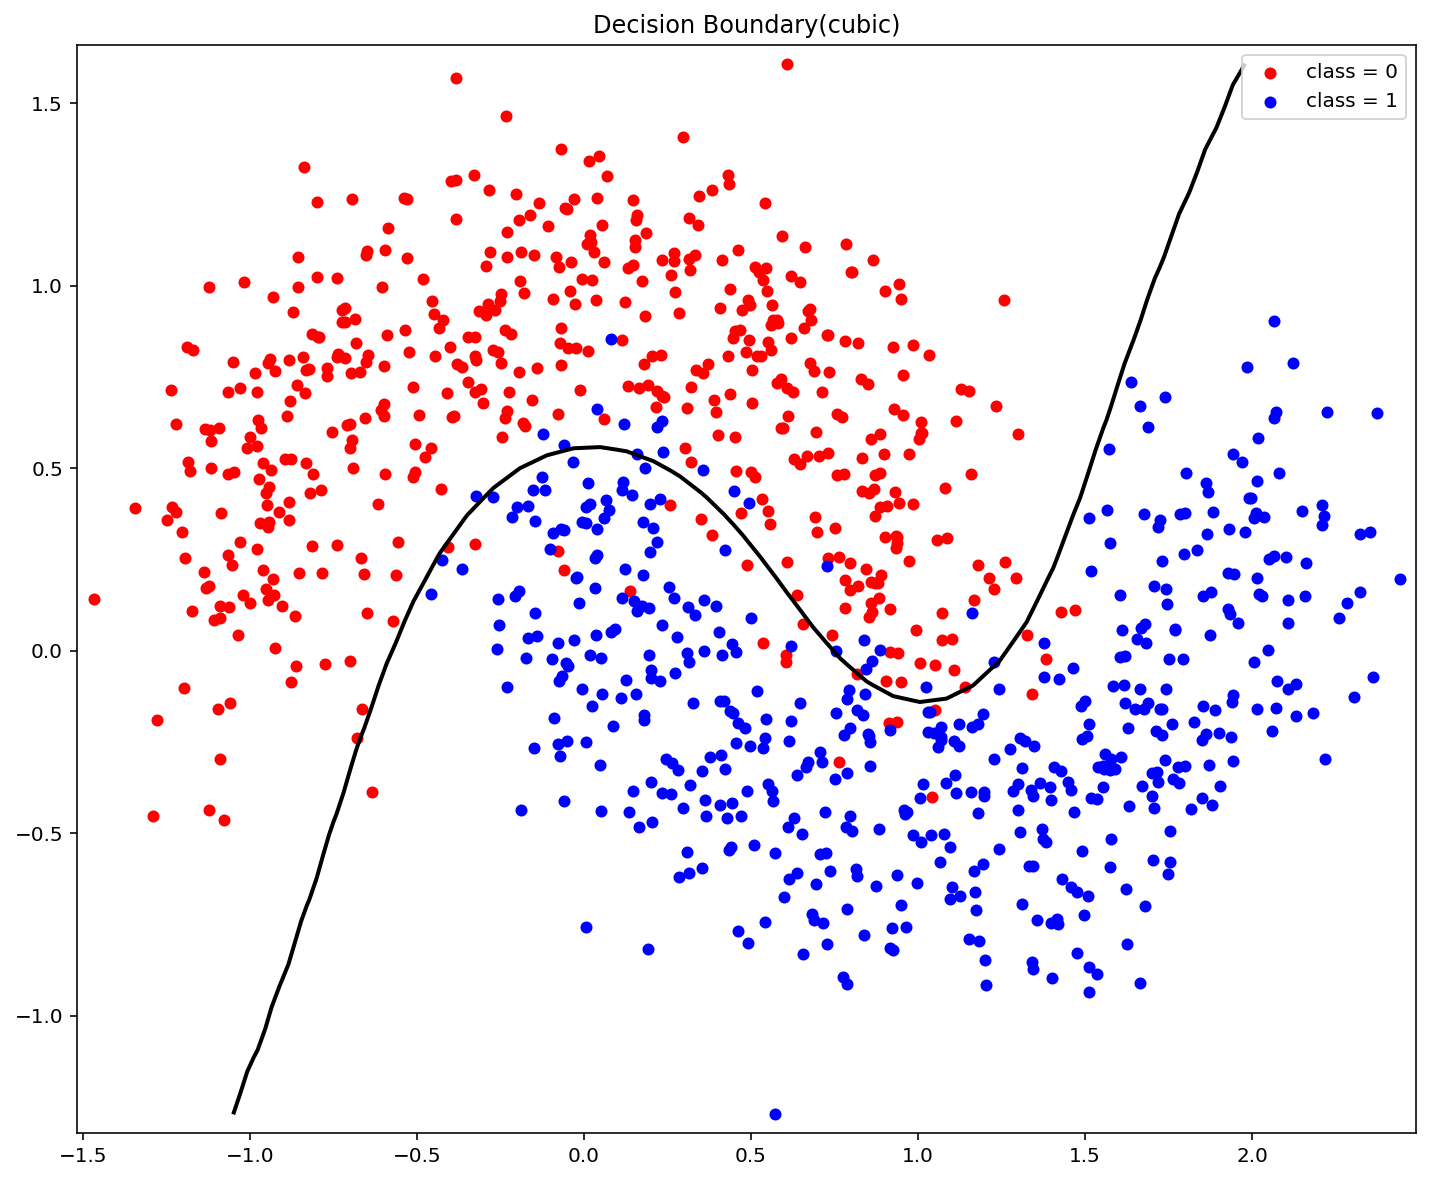

In [16]:
# plot
plt.figure(4,figsize=(12,10))

plt.scatter(x1[idx==0],x2[idx==0], s=25, c='r', label ='class = 0')
plt.scatter(x1[idx==1],x2[idx==1], c='blue', s=25, label = 'class = 1')
plt.contour(xx1,xx2, p,levels=[0.5], linewidths=2, colors='k') 
plt.legend(loc='best')
plt.xlim([x1_min-0.05,x1_max+0.05])
plt.ylim([x2_min-0.05,x2_max+0.05])
plt.title('Decision Boundary(cubic)')
plt.show()

## 4. Plot the probability map of the obtained classifier [2pt]
<hr>

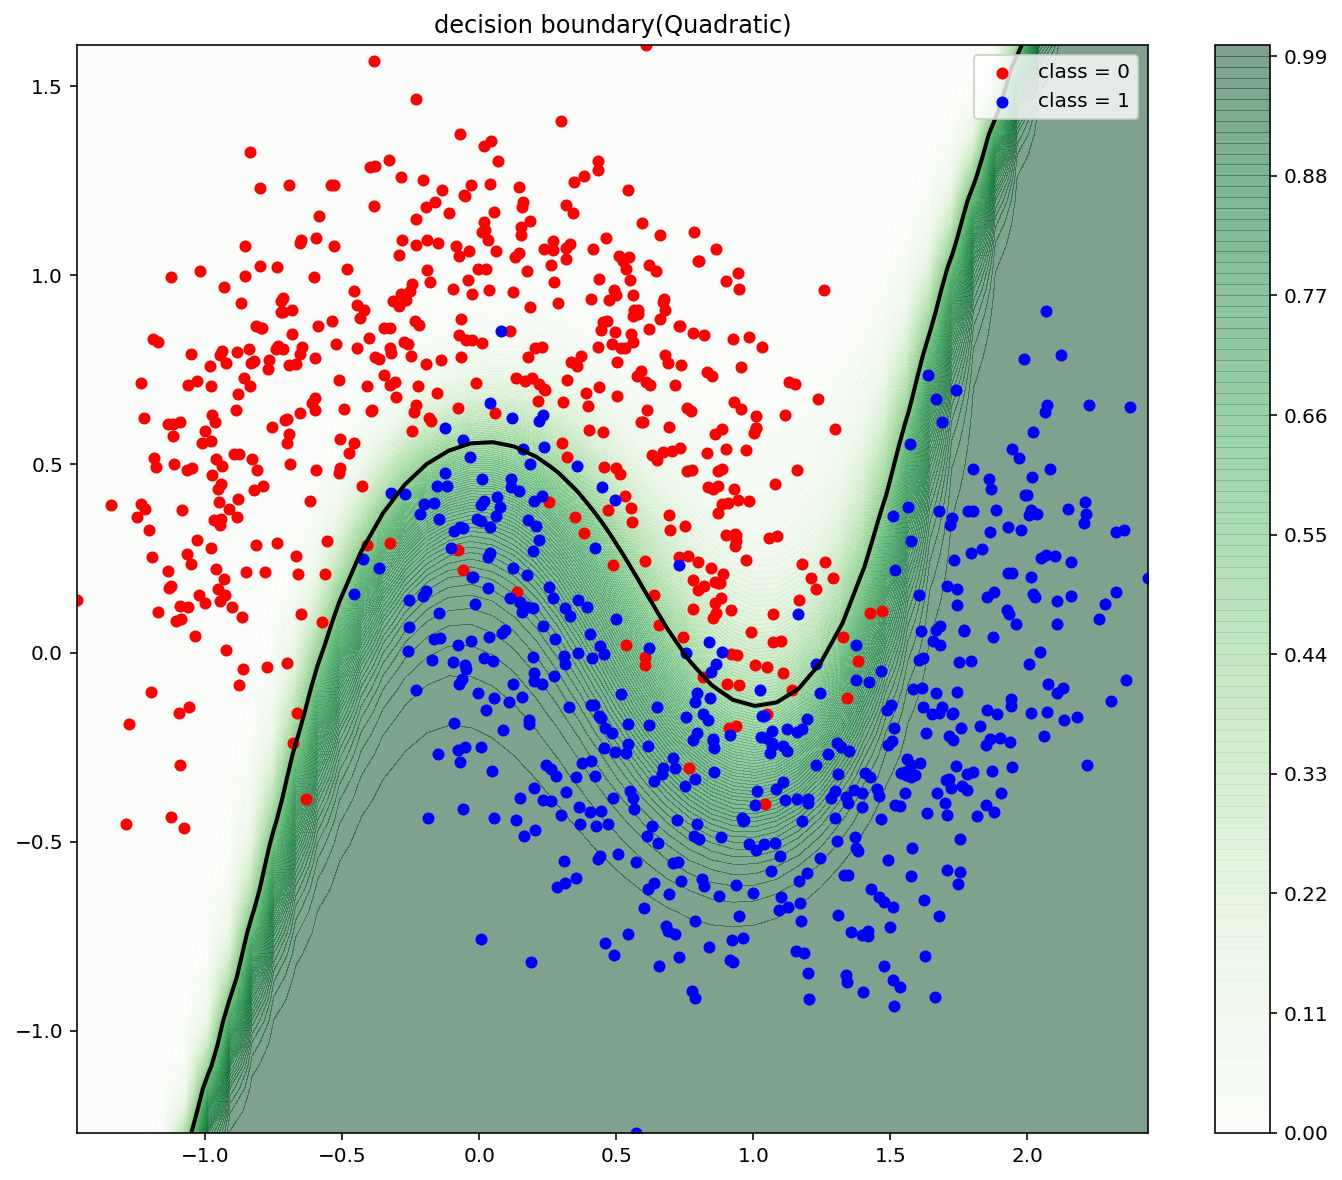

In [17]:
# compute values p(x) for multiple data points x
plt.figure(4,figsize=(12,10))

ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='Greens', alpha=0.5)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter(x1[idx==0],x2[idx==0], s=25, c='r', label ='class = 0')
plt.scatter(x1[idx==1],x2[idx==1], c='blue', s=25, label = 'class = 1')
plt.contour(xx1,xx2, p,levels=[0.5], linewidths=2, colors='k') 
plt.legend(loc='best')
plt.title('decision boundary(Quadratic)')
plt.show()

## 5. Compute the classification accuracy [1pt]
<hr>

In [18]:
# compute the accuracy of the classifier
n = data.shape[0]

#plot 
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label

idx_class0 = idx[idx==0] # index of class0
idx_class1 = idx[idx==1] # index of class1
predict = f_pred(X,w2)
predict[predict >=  0.5] = 1
predict[predict <  0.5] = 0
correct = np.sum(predict==y)
correct
accuracy = correct / n * 100
accuracy
print("total number of data = ",n)
print("total number of correctly classified = ",correct)
print("accuracy(%) = ",accuracy)

total number of data =  1000
total number of correctly classified =  954
accuracy(%) =  95.39999999999999
